# Aufgabe 16

## Teilaufgabe a) 

Die Entropie der Wurzel lässt sich nach der Formel
$$ H(Y) = -\sum_{z\,\in\, Z} P(Y = z)log_{2}P(Y = z)$$
berechnen. Dabei sind die möglichen Ereignisse "Fußball spielen" bzw. "kein Fußball spielen".
Es ergibt sich daher: 
$$ H(Fußball) = -\left(\frac{n_{Fußball}}{n}log_{2}\frac{n_{Fußball}}{n} + \frac{n_{keinFußball}}{n}log_{2}\frac{n_{keinFußball}}{n}\right) $$
wobei n die Anzahl der überprüften Fälle ist.

Berechnung:

In [8]:
import math
import numpy as np
import matplotlib.pyplot as plt

In [9]:
p_f = 9/14
p_kf = 5/14 

H_f = -(p_f*math.log(p_f,2) + p_kf*math.log(p_kf,2))

print('Wert der Entropie:')
print(H_f)

Wert der Entropie:
0.9402859586706309


## Teilaufgabe b) 

Zur Berechnung des Informationsgewinns wird die Entropie nach einem Schnitt auf dem Attribut Wind benötigt. Die Entropie nach einem Schnitt auf irgendeinem Attribut wird allgemein berechnet nach
\begin{align*}
H(Y|X) &= \sum_{m\,\in\, M} P(X = m)H(Y|X = m) \\ &= -\sum_{m\,\in\, M} P(X = m)\sum_{z\,\in\, Z}P(Y = z|X = m)log_{2}P(Y = z|X = m)
\end{align*}
in unserem Fall also
\begin{align*}
H(Fußball|X) = \frac{n_{Wind}}{n}H(Fußball|Wind) + \frac{n_{keinWind}}{n}H(keinFußball|Wind)
\end{align*}
wobei 
\begin{align*}
&H(Fußball|Wind) = -\left(\frac{n_{Fußball,Wind}}{n_{Wind}}log_{2}\frac{n_{Fußball,Wind}}{n_{Wind}} + \frac{n_{keinFußball,Wind}}{n_{Wind}}log_{2}\frac{n_{keinFußball,Wind}}{n_{Wind}}\right) \\
&H(Fußball|keinWind) = -\left(\frac{n_{Fußball,keinWind}}{n_{keinWind}}log_{2}\frac{n_{Fußball,keinWind}}{n_{keinWind}} + \frac{n_{keinFußball,keinWind}}{n_{keinWind}}log_{2}\frac{n_{keinFußball,keinWind}}{n_{keinWind}}\right)
\end{align*}

Berechnung:

In [10]:
p_w_f = 3/6
p_w_kf = 3/6
p_kw_f = 6/8
p_kw_kf = 2/8
p_w = 6/14
p_kw = 8/14

H_w_f = -p_w*(p_w_f*math.log(p_w_f,2) + p_w_kf*math.log(p_w_kf,2)) - p_kw*(p_kw_f*math.log(p_kw_f,2) + p_kw_kf*math.log(p_kw_kf,2))
print('Wert der Entropie nach Schnitt auf Attribut Wind:')
print(H_w_f)

Wert der Entropie nach Schnitt auf Attribut Wind:
0.8921589282623617


Der Informationsgewinn lässt sich dann berechnen aus
\begin{align*}
IG(Fußball, Wind) = H(Fußball) - H(Fußball|X)
\end{align*}

Berechnung:

In [11]:
IG = H_f - H_w_f
print('Informationsgewinn nach Schnitt auf Attribut Wind:')
print(IG)

Informationsgewinn nach Schnitt auf Attribut Wind:
0.04812703040826927


## Teilaufgabe c) 

Das gleiche Verfahren wird nun auch auf die anderen Attribute angewandt.
Hierbei müssen dann alle möglichen Schnitte überprüft werden.

### Wettervorhersage:

Schnitt bei:
2
Informationsgewinn:
0.0
-----------------------------
Schnitt bei:
1
Informationsgewinn:
0.10224356360985043
-----------------------------
Schnitt bei:
0
Informationsgewinn:
0.003184853044648883
-----------------------------


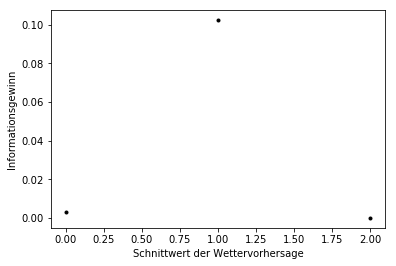

In [12]:
#Wettervorhersage
W = np.array([2,2,1,0,0,0,1,2,2,0,2,1,1,0])

#streicht doppelte einträge, sind sinnvolle CutWerte (damit sich nichts doppelt)
cutvalue = dict(map(lambda i: (i,1),W)).keys() 
#Anzahl Werte
valnum = len(W)
#Matrix aus Werten und Information über Fußball ja(1)/nein(0)
W = np.array([[2,2,1,0,0,0,1,2,2,0,2,1,1,0], [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

#Aufteilen der Werte in über oder unter dem CutWert liegende Werte
#Das alles für alle unterschiedlichen CutWerte
for i in cutvalue:
    lowerf = np.array([]) #Array mit Information übers Fußballspielen der tieferen Werte
    higherf = np.array([]) #Array mit Information übers Fußballspielen der höheren Werte
    n = 0
    while n < 14:
        if W[0,n] <= i: 
            lowerf = np.append(lowerf, W[1,n])
        else:
            higherf= np.append(higherf, W[1,n])
        n+=1
    
#Berechnung der Entropien aus den einzelnen Wahrscheinlichkeiten, welche man aus den längen der oben berechneten Arrays erhält
#if-Abfragen damit keine 0 im log2 steht
    H = 0 
    if len(lowerf[lowerf==0]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==0])/len(lowerf)*math.log(len(lowerf[lowerf==0])/len(lowerf),2))
    if len(lowerf[lowerf==1]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==1])/len(lowerf)*math.log(len(lowerf[lowerf==1])/len(lowerf),2)) 
    if len(higherf[higherf==0]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==0])/len(higherf)*math.log(len(higherf[higherf==0])/len(higherf),2))
    if len(higherf[higherf==1]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==1])/len(higherf)*math.log(len(higherf[higherf==1])/len(higherf),2))
    
    IG = H_f - H
    print('Schnitt bei:')
    print(i)
    print('Informationsgewinn:')
    print(IG)
    print('-----------------------------')
    plt.plot(i, IG, 'k.')

plt.xlabel('Schnittwert der Wettervorhersage')
plt.ylabel('Informationsgewinn')
plt.show()

Es ergibt sich bester Inormationsgewinn mit einem Schnitt bei einer 
Wettervorhersage zwischen 0 und 1.

Dieser beträgt $IG = 0.10224356360985043$

### Luftfeuchtigkeit: 

Schnitt bei:
85
Informationsgewinn:
0.02507817350585051
-----------------------------
Schnitt bei:
90
Informationsgewinn:
0.010318100909640027
-----------------------------
Schnitt bei:
78
Informationsgewinn:
0.09027634939276485
-----------------------------
Schnitt bei:
96
Informationsgewinn:
0.0
-----------------------------
Schnitt bei:
80
Informationsgewinn:
0.10224356360985043
-----------------------------
Schnitt bei:
70
Informationsgewinn:
0.01495606992897247
-----------------------------
Schnitt bei:
65
Informationsgewinn:
0.047709111427960416
-----------------------------
Schnitt bei:
95
Informationsgewinn:
0.047709111427960416
-----------------------------
Schnitt bei:
75
Informationsgewinn:
0.04533417202914436
-----------------------------


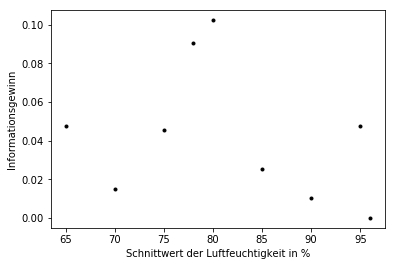

In [13]:
#Luftfeuchtigkeit
LF = np.array([85, 90, 78, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 80])

#streicht doppelte einträge, sind sinnvolle CutWerte (damit sich nichts doppelt)
cutvalue = dict(map(lambda i: (i,1),LF)).keys() 
#Anzahl Werte
valnum = len(LF)
#Matrix aus Werten und Information über Fußball ja(1)/nein(0)
LF = np.array([[85, 90, 78, 96, 80, 70, 65, 95, 70, 80, 70, 90, 75, 80], [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

#Aufteilen der Werte in über oder unter dem CutWert liegende Werte
#Das alles für alle unterschiedlichen CutWerte
for i in cutvalue:
    lowerf = np.array([]) #Array mit Information übers Fußballspielen der tieferen Werte
    higherf = np.array([]) #Array mit Information übers Fußballspielen der höheren Werte
    n = 0
    while n < 14:
        if LF[0,n] <= i: 
            lowerf = np.append(lowerf, LF[1,n])
        else:
            higherf= np.append(higherf, LF[1,n])
        n+=1
    
#Berechnung der Entropien aus den einzelnen Wahrscheinlichkeiten, welche man aus den längen der oben berechneten Arrays erhält
#if-Abfragen damit keine 0 im log2 steht
    H = 0 
    if len(lowerf[lowerf==0]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==0])/len(lowerf)*math.log(len(lowerf[lowerf==0])/len(lowerf),2))
    if len(lowerf[lowerf==1]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==1])/len(lowerf)*math.log(len(lowerf[lowerf==1])/len(lowerf),2)) 
    if len(higherf[higherf==0]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==0])/len(higherf)*math.log(len(higherf[higherf==0])/len(higherf),2))
    if len(higherf[higherf==1]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==1])/len(higherf)*math.log(len(higherf[higherf==1])/len(higherf),2))
    
    IG = H_f - H
    print('Schnitt bei:')
    print(i)
    print('Informationsgewinn:')
    print(IG)
    print('-----------------------------')
    plt.plot(i, IG, 'k.')

plt.xlabel('Schnittwert der Luftfeuchtigkeit in %')
plt.ylabel('Informationsgewinn')
plt.show()


Es ergibt sich bester Inormationsgewinn mit einem Schnitt bei einem Feuchtigkeitswert zwischen 80% und 85%.

Dieser beträgt $IG = 0.10224356360985043$

### Temperatur:

Analog zu Luftfeuchtigkeit

Schnitt bei:
29.4
Informationsgewinn:
0.0
-----------------------------
Schnitt bei:
26.7
Informationsgewinn:
0.0004894691870229728
-----------------------------
Schnitt bei:
28.3
Informationsgewinn:
0.11340086418110329
-----------------------------
Schnitt bei:
21.1
Informationsgewinn:
0.04533417202914436
-----------------------------
Schnitt bei:
20.0
Informationsgewinn:
0.0004894691870229728
-----------------------------
Schnitt bei:
18.3
Informationsgewinn:
0.010318100909640027
-----------------------------
Schnitt bei:
17.8
Informationsgewinn:
0.047709111427960416
-----------------------------
Schnitt bei:
22.2
Informationsgewinn:
0.0013397424044412354
-----------------------------
Schnitt bei:
20.6
Informationsgewinn:
0.01495606992897247
-----------------------------
Schnitt bei:
23.9
Informationsgewinn:
0.02507817350585051
-----------------------------
Schnitt bei:
27.2
Informationsgewinn:
0.010318100909640027
-----------------------------
Schnitt bei:
21.7
Informationsgewinn:
0

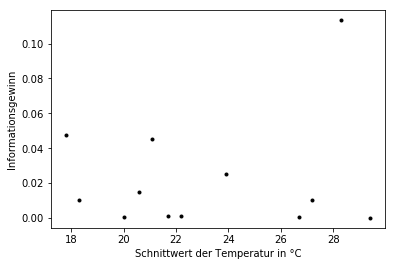

In [14]:
#Temperatur
T = np.array([29.4, 26.7, 28.3, 21.1, 20, 18.3, 17.8, 22.2, 20.6, 23.9, 23.9, 22.2, 27.2, 21.7])

#streicht doppelte einträge, sind sinnvolle CutWerte (damit sich nichts doppelt)
cutvalue = dict(map(lambda i: (i,1),T)).keys() 
#Anzahl Werte
valnum = len(T)
#Matrix aus Werten und Information über Fußball ja(1)/nein(0)
T = np.array([[29.4, 26.7, 28.3, 21.1, 20, 18.3, 17.8, 22.2, 20.6, 23.9, 23.9, 22.2, 27.2, 21.7], [0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0]])

#Aufteilen der Werte in über oder unter dem CutWert liegende Werte
#Das alles für alle unterschiedlichen CutWerte
for i in cutvalue:
    lowerf = np.array([]) #Array mit Information übers Fußballspielen der tieferen Werte
    higherf = np.array([]) #Array mit Information übers Fußballspielen der höheren Werte
    n = 0
    while n < 14:
        if T[0,n] <= i: 
            lowerf = np.append(lowerf, T[1,n])
        else:
            higherf= np.append(higherf, T[1,n])
        n+=1
    
#Berechnung der Entropien aus den einzelnen Wahrscheinlichkeiten, welche man aus den längen der oben berechneten Arrays erhält
#if-Abfragen damit keine 0 im log2 steht
    H = 0 
    if len(lowerf[lowerf==0]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==0])/len(lowerf)*math.log(len(lowerf[lowerf==0])/len(lowerf),2))
    if len(lowerf[lowerf==1]) != 0:
        H += -len(lowerf)/valnum*(len(lowerf[lowerf==1])/len(lowerf)*math.log(len(lowerf[lowerf==1])/len(lowerf),2)) 
    if len(higherf[higherf==0]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==0])/len(higherf)*math.log(len(higherf[higherf==0])/len(higherf),2))
    if len(higherf[higherf==1]) != 0:
        H += -len(higherf)/valnum*(len(higherf[higherf==1])/len(higherf)*math.log(len(higherf[higherf==1])/len(higherf),2))
    
    IG = H_f - H
    print('Schnitt bei:')
    print(i)
    print('Informationsgewinn:')
    print(IG)
    print('-----------------------------')
    plt.plot(i, IG, 'k.')

plt.xlabel('Schnittwert der Temperatur in °C')
plt.ylabel('Informationsgewinn')
plt.show()


Es ergibt sich bester Inormationsgewinn mit einem Schnitt bei einer Temperatur zwischen 28,3°C und 29,4°C.

Dieser beträgt $IG = 0.11340086418110329$

## Teilaufgabe d) 

Bei nur einem Schritt eignet sich also die Temperatur am besten zum Trennen der Daten.